In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Analyzed dataset was downloaded from Kaggle.com (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt).
The main task was to use regression model to predict house prices based on 79 explanatory variables (description available here: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt)

In [4]:
columns = ['SalePrice', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley', 'LotShape', 'Utilities', 'LotConfig', 'Neighborhood', 'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtFinType1', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'YrSold', 'SaleType', 'SaleCondition']

To the further analysis only columns with more general data were chosen, also too detailed or related to the secondary qualities won't be included. 

In [5]:
houses = pd.read_csv('train.csv', usecols=columns)

In [6]:
houses.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,Utilities,LotConfig,Neighborhood,BldgType,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,NaN,Reg,AllPub,Inside,CollgCr,1Fam,...,0,0,0,0,NaN,NaN,2008,WD,Normal,208500
1,20,RL,9600,Pave,NaN,Reg,AllPub,FR2,Veenker,1Fam,...,0,0,0,0,NaN,NaN,2007,WD,Normal,181500
2,60,RL,11250,Pave,NaN,IR1,AllPub,Inside,CollgCr,1Fam,...,0,0,0,0,NaN,NaN,2008,WD,Normal,223500
3,70,RL,9550,Pave,NaN,IR1,AllPub,Corner,Crawfor,1Fam,...,272,0,0,0,NaN,NaN,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,NaN,IR1,AllPub,FR2,NoRidge,1Fam,...,0,0,0,0,NaN,NaN,2008,WD,Normal,250000


In [7]:
cols=list(houses.columns)

In [8]:
cols_with_missing = []
for col in cols:
    number_of_missing = houses[col].isna().sum()
    if number_of_missing > 100:
        cols_with_missing.append(col)
        print(col, number_of_missing)
    if number_of_missing < 100 and number_of_missing >=1:
        print("Minor missing:", col, number_of_missing )

Alley 1369
Minor missing: BsmtCond 37
Minor missing: BsmtFinType1 37
Minor missing: Electrical 1
FireplaceQu 690
Minor missing: GarageType 81
Minor missing: GarageQual 81
Minor missing: GarageCond 81
PoolQC 1453
Fence 1179


In [9]:
cols_with_missing

['Alley', 'FireplaceQu', 'PoolQC', 'Fence']

Missing values:
- columns with too much missing values (over 100) will be removed;
- in columns describing basement or garage, NaN values occur when property has no garage or basement - in this case NaN values will be replaced by categorical value 'None';
- there is one missing value in column "Electrical", this column describes type of electrical installation in property; fuse technology is old and in not used in new buildings, property with missing value was built in 2006, so NaN will be replaced with 'SBrkr' value. 

In [10]:
houses.drop(cols_with_missing, axis=1, inplace=True)

In [11]:
houses['GarageType'] = houses['GarageType'].replace(np.nan, 'None')
houses['GarageQual'] = houses['GarageQual'].replace(np.nan, 'None')
houses['GarageCond'] = houses['GarageCond'].replace(np.nan, 'None')
houses['BsmtCond'] = houses['BsmtCond'].replace(np.nan, 'None')
houses['BsmtFinType1'] = houses['BsmtFinType1'].replace(np.nan, 'None')
houses['Electrical'] = houses['Electrical'].replace(np.nan, 'SBrkr')

In [12]:
houses.shape

(1460, 49)

In [13]:
houses.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,...,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,1057.429452,1162.626712,346.992466,0.425342,...,0.613014,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,438.705324,386.587738,436.528436,0.518911,...,0.644666,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,795.750000,882.000000,0.000000,0.000000,...,0.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,991.500000,1087.000000,0.000000,0.000000,...,1.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,1298.250000,1391.250000,728.000000,1.000000,...,1.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,6110.000000,4692.000000,2065.000000,3.000000,...,3.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,2010.000000,755000.000000


<H3>Quantitative variables analysis</H3>

In [14]:
num_cols = houses.describe().columns
num_cols

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'YrSold',
       'SalePrice'],
      dtype='object')

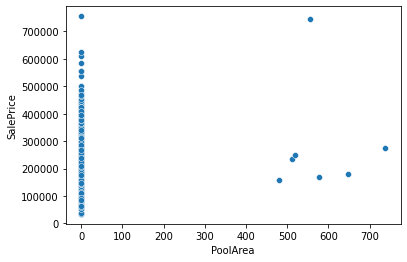

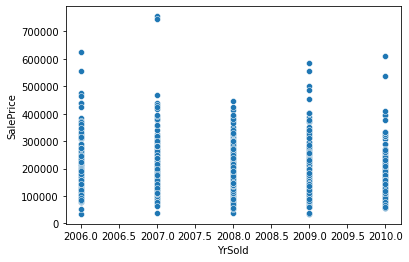

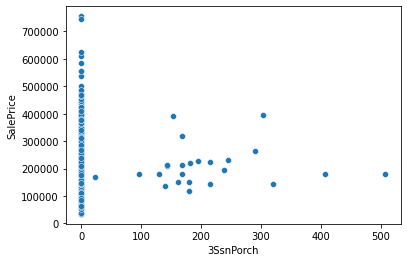

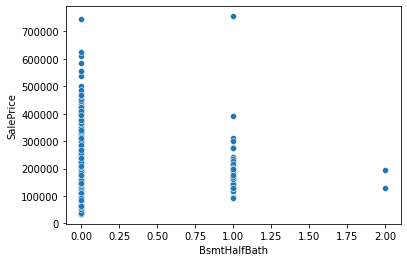

In [15]:
cols_not_corr = ['PoolArea', 'YrSold', '3SsnPorch', 'BsmtHalfBath']
for col in cols_not_corr:
    sns.scatterplot(x=houses[col],y=houses['SalePrice'])
    plt.show()

Variables 'PoolArea', 'YrSold', '3SsnPorch', 'BsmtHalfBath' don't offer valuable information,therefore I will remove them.

In [16]:
houses.drop(cols_not_corr, axis=1, inplace=True)

In [17]:
houses.shape

(1460, 45)

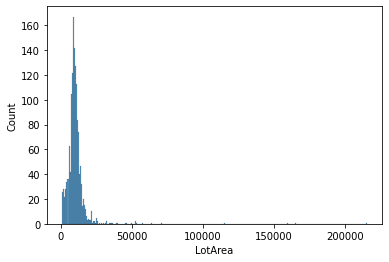

In [18]:
sns.histplot(data=houses["LotArea"])
plt.show()

In [19]:
print("Average house price:" + str(round(np.mean(houses['SalePrice']), 0)))
print("Maximum house price:" + str(round(np.max(houses['SalePrice']), 0)))      

Average house price:180921.0
Maximum house price:755000


In [20]:
print("Average LotArea:" + str(round(np.mean(houses['LotArea']), 0)))

Average LotArea:10517.0


In [21]:
outliers = houses[houses['LotArea']>100000]
outliers[['MSZoning','LotArea','SalePrice']]

,MSZoning,LotArea,SalePrice
249,RL,159000,277000
313,RL,215245,375000
335,RL,164660,228950
706,RL,115149,302000


Samples with Lot Area larger than 100000 sqare feet (10 times more than average LotArea) are probably the outliers and will be removed.

In [22]:
houses=houses.drop([249,313,335,706], axis=0)

<H4> Quantitative continous variables overview </H4>

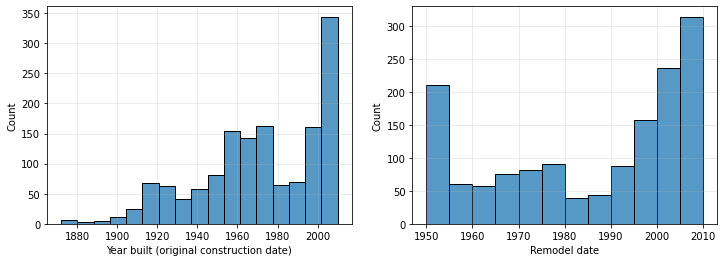

In [23]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=houses['YearBuilt'])
plt.xlabel('Year built (original construction date)')
plt.grid(alpha = 0.3)
plt.subplot(1,2,2)
sns.histplot(data=houses['YearRemodAdd'])
plt.xlabel('Remodel date')
plt.grid(alpha = 0.3)
plt.show()

- Most houses in analyzed dataset were build in 1950-1970 and 1995-2010 periods.
- Renovations were mostly made in periods 1950-1955 and 1995-2010.
- Both facts show, that most houses in dataset are in relatively good condition.

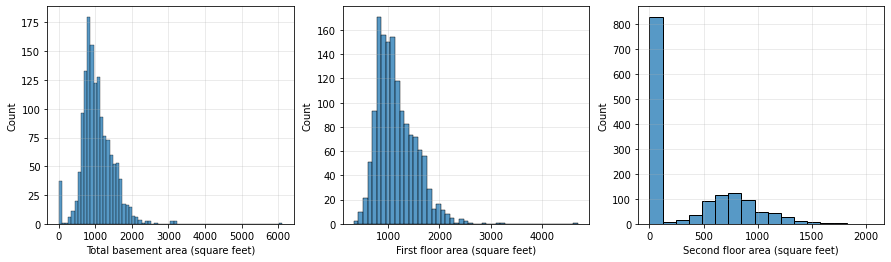

In [24]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.histplot(data=houses['TotalBsmtSF'])
plt.xlabel('Total basement area (square feet)')
plt.grid(alpha = 0.3)
plt.subplot(1,3,2)
sns.histplot(data=houses['1stFlrSF'])
plt.xlabel('First floor area (square feet)')
plt.grid(alpha = 0.3)
plt.subplot(1,3,3)
sns.histplot(data=houses['2ndFlrSF'])
plt.xlabel('Second floor area (square feet)')
plt.grid(alpha = 0.3)
plt.show()

- Basment and first floor areas are very similar, probably those variables correlate (this will be verified later).
- Almost half of houses in dataset don't have second floor.

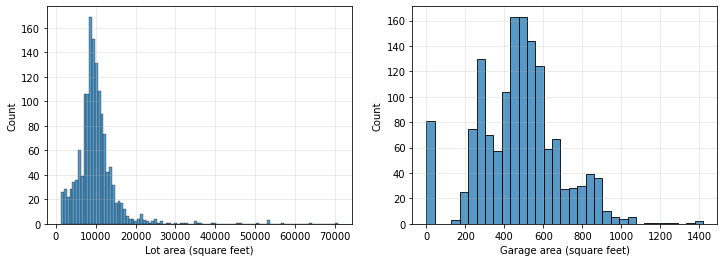

In [25]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=houses['LotArea'])
plt.xlabel('Lot area (square feet)')
plt.grid(alpha = 0.3)
plt.subplot(1,2,2)
sns.histplot(data=houses['GarageArea'])
plt.xlabel('Garage area (square feet)')
plt.grid(alpha = 0.3)
plt.show()

In [26]:
print('Mean lot area is: ' + str(round(np.mean(houses['LotArea']),2)))
print('Mean garage area is: ' + str(round(np.mean(houses['GarageArea']),2)))

Mean lot area is: 10096.51
Mean garage area is: 472.79


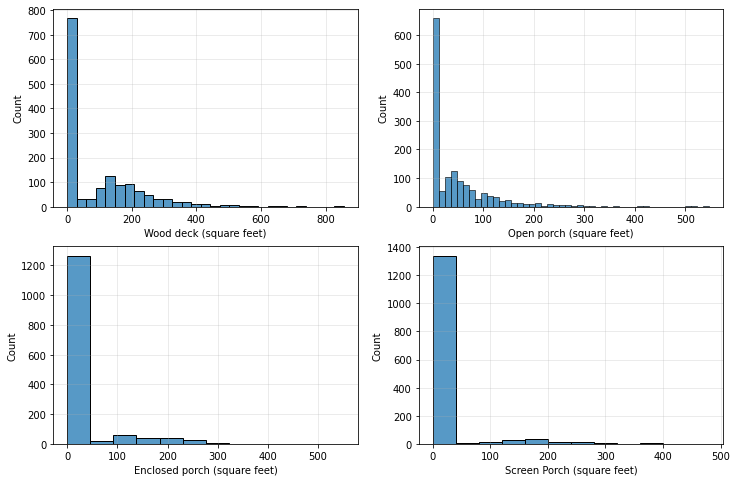

In [27]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.histplot(data=houses['WoodDeckSF'])
plt.xlabel('Wood deck (square feet)')
plt.grid(alpha = 0.3)
plt.subplot(2,2,2)
sns.histplot(data=houses['OpenPorchSF'])
plt.xlabel('Open porch (square feet)')
plt.grid(alpha = 0.3)
plt.subplot(2,2,3)
sns.histplot(data=houses['EnclosedPorch'])
plt.xlabel('Enclosed porch (square feet)')
plt.grid(alpha = 0.3)
plt.subplot(2,2,4)
sns.histplot(data=houses['ScreenPorch'])
plt.xlabel('Screen Porch (square feet)')
plt.grid(alpha = 0.3)
plt.show()

<H4> Quantitative discrete variables overview</H4>

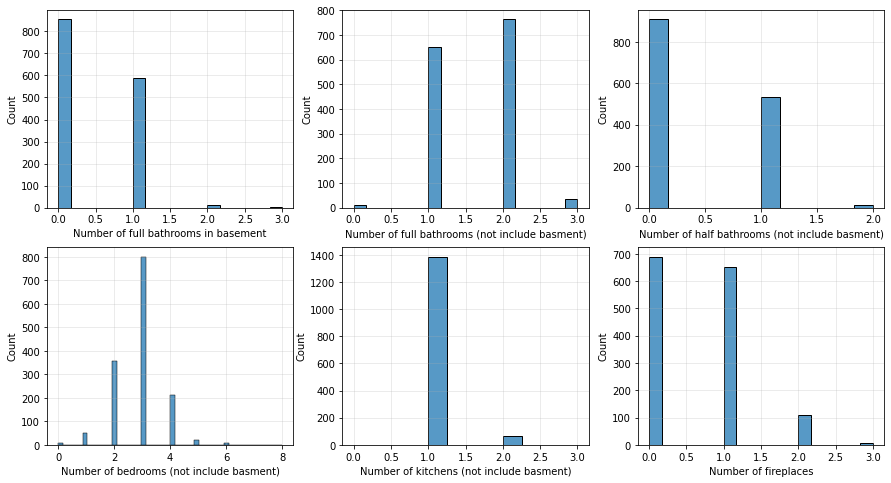

In [28]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.histplot(data=houses['BsmtFullBath'])
plt.xlabel('Number of full bathrooms in basement')
plt.grid(alpha = 0.3)
plt.subplot(2,3,2)
sns.histplot(data=houses['FullBath'])
plt.xlabel('Number of full bathrooms (not include basment)')
plt.grid(alpha = 0.3)
plt.subplot(2,3,3)
sns.histplot(data=houses['HalfBath'])
plt.xlabel('Number of half bathrooms (not include basment)')
plt.grid(alpha = 0.3)
plt.subplot(2,3,4)
sns.histplot(data=houses['BedroomAbvGr'])
plt.xlabel('Number of bedrooms (not include basment)')
plt.grid(alpha = 0.3)
plt.subplot(2,3,5)
sns.histplot(data=houses['KitchenAbvGr'])
plt.xlabel('Number of kitchens (not include basment)')
plt.grid(alpha = 0.3)
plt.subplot(2,3,6)
sns.histplot(data=houses['Fireplaces'])
plt.xlabel('Number of fireplaces')
plt.grid(alpha = 0.3)
plt.show()

- Almost 900 properties don't have full bathroom in basement, if there is a bathroom in basement, mostly there is only one. Two or three bathrooms in basement are rare.
- Most popular number of full bathrooms in house (not including basement) is two and less often - one. Only a little number of houses is equipped in 3 full bathrooms, and there are a few houses with no bathroom (not including basement) at all.
- About 500 houses are equipped in one half bathroom (not including basement), but this solution is not popular and most houses don't have a half bathroom at all.
- If basement is not included, most popular number of bedrooms is 3 (almost 800 houses), on the second place are houses with two rooms (about 350) and houses with 4 bedrooms are in third place. 
- Most houses in this dataset are equipped in one kitchen.
- Almost half houses are not equipped with fireplace. About 650 houses posses one fireplace and about 100 two fireplaces. Only few possesions have three fireplces.

<H3> Categorical variables analysis</H3>

In [29]:
cat_col=[item for item in list(houses.columns) if item not in list(houses.describe().columns)]

In [30]:
print(cat_col)

['MSZoning', 'Street', 'LotShape', 'Utilities', 'LotConfig', 'Neighborhood', 'BldgType', 'Exterior1st', 'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [31]:
cols_to_remove = ['Street', 'Utilities', 'Heating']

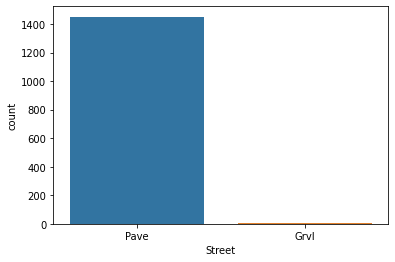

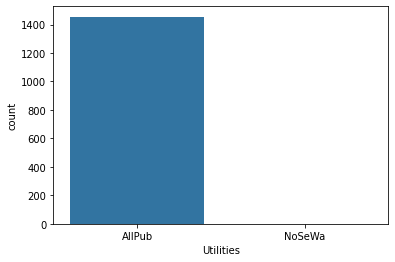

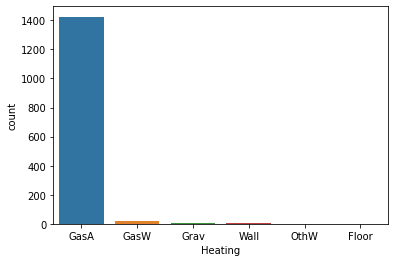

In [32]:
for col in cols_to_remove:
    sns.countplot(data=houses, x=houses[col])
    plt.show()

As it can be seen on the above picture features: 'Street', 'Utilities' and 'Heating' don't offer any valuable information, therefore I will remove them.

In [33]:
houses.drop(cols_to_remove, axis=1, inplace=True)

In [34]:
houses.shape

(1456, 42)

In [35]:
cat_col_less=[item for item in list(houses.columns) if item not in list(houses.describe().columns)]
print(cat_col_less)

['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'Exterior1st', 'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


<H4> Categorical features overview</H4>

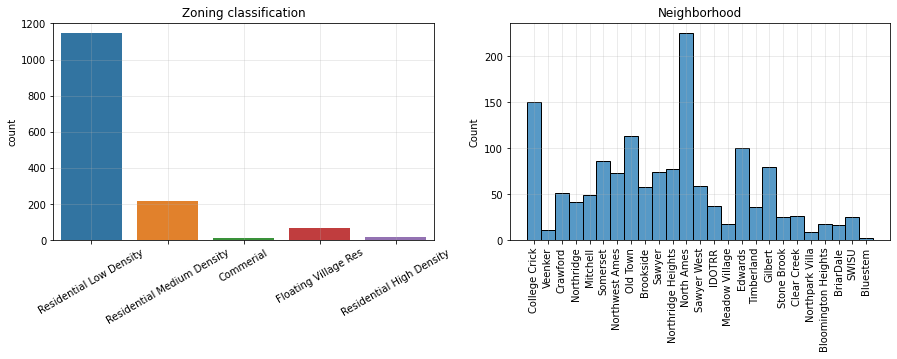

In [36]:
neigh_labels=['College Crick', 'Veenker', 'Crawford', 'Northridge', 'Mitchell', 'Somerset', 'Northwest Ames', 'Old Town', 'Brookside', 'Sawyer', 'Northridge Heights', 'North Ames', 'Sawyer West', 'IDOTRR', 'Meadow Village', 'Edwards', 'Timberland', 'Gilbert', 'Stone Brook', 'Clear Creek', 'Northpark Villa', 'Bloomington Heights', 'BriarDale', 'SWISU', 'Bluestem']
plt.figure(figsize=(15,4))
ax0=plt.subplot(1,2,1)
sns.countplot(data=houses, x=houses['MSZoning'])
plt.xlabel('')
plt.title('Zoning classification')
plt.grid(alpha = 0.3)
ax0.set_xticklabels(['Residential Low Density', 'Residential Medium Density', 'Commerial', 'Floating Village Res', 'Residential High Density'], rotation=30)
ax1=plt.subplot(1,2,2)
sns.histplot(data=houses, x=houses['Neighborhood'])
plt.title('Neighborhood')
plt.xlabel('')
ax1.set_xticks(range(len(neigh_labels)))
ax1.set_xticklabels(neigh_labels, rotation=90)
plt.grid(alpha = 0.3)
plt.show()

- Most properties in analazed dataset are placed in residential low and medium density zones.
- Most popular neighborhoods are North Ames and College Creek.

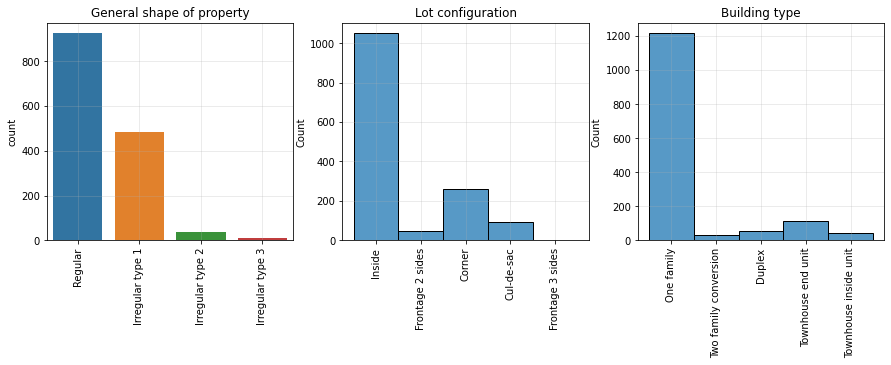

In [37]:
lot_lab=['Inside', 'Frontage 2 sides', 'Corner', 'Cul-de-sac', 'Frontage 3 sides']
bldg_lab=['One family', 'Two family conversion', 'Duplex', 'Townhouse end unit', 'Townhouse inside unit']
plt.figure(figsize=(15,4))
ax0=plt.subplot(1,3,1)
sns.countplot(data=houses, x=houses['LotShape'])
plt.xlabel('')
plt.title('General shape of property')
ax0.set_xticklabels(['Regular', 'Irregular type 1', 'Irregular type 2', 'Irregular type 3'], rotation=90)
plt.grid(alpha = 0.3)
ax1=plt.subplot(1,3,2)
sns.histplot(data=houses, x=houses['LotConfig'])
plt.xlabel('')
plt.title('Lot configuration')
ax1.set_xticks(range(len(lot_lab)))
ax1.set_xticklabels(lot_lab, rotation=90)
plt.grid(alpha = 0.3)
ax2=plt.subplot(1,3,3)
sns.histplot(data=houses, x=houses['BldgType'])
plt.xlabel('')
plt.title('Building type')
ax2.set_xticks(range(len(bldg_lab)))
ax2.set_xticklabels(bldg_lab, rotation=90)
plt.grid(alpha = 0.3)
plt.show()

- Most properies have regular shape, are placed between other properties. 
- Most houses are one-family type.

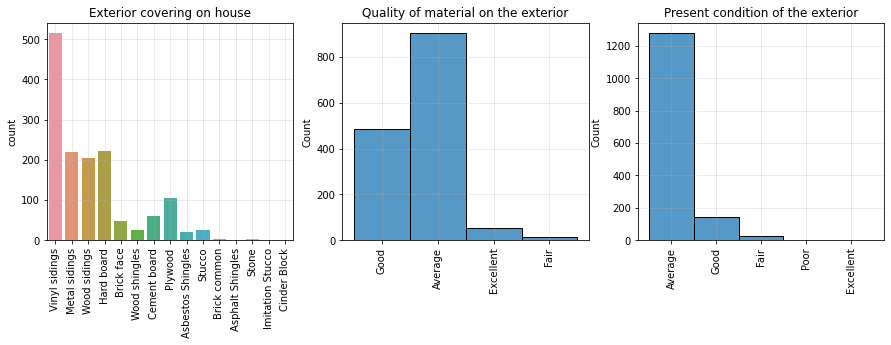

In [38]:
mat_lab=['Vinyl sidings', 'Metal sidings', 'Wood sidings', 'Hard board', 'Brick face', 'Wood shingles', 'Cement board', 'Plywood', 'Asbestos Shingles', 'Stucco', 'Brick common', 'Asphalt Shingles', 'Stone', 'Imitation Stucco', 'Cinder Block']
qual_lab=['Good', 'Average', 'Excellent', 'Fair']
cond_lab=['Average', 'Good', 'Fair', 'Poor', 'Excellent']
plt.figure(figsize=(15,4))
ax0=plt.subplot(1,3,1)
sns.countplot(data=houses, x=houses['Exterior1st'])
plt.xlabel('')
plt.title('Exterior covering on house')
ax0.set_xticks(range(len(mat_lab)))
ax0.set_xticklabels(mat_lab, rotation=90)
plt.grid(alpha = 0.3)
ax1=plt.subplot(1,3,2)
sns.histplot(data=houses, x=houses['ExterQual'])
plt.xlabel('')
plt.title('Quality of material on the exterior')
ax1.set_xticks(range(len(qual_lab)))
ax1.set_xticklabels(qual_lab, rotation=90)
plt.grid(alpha = 0.3)
ax2=plt.subplot(1,3,3)
sns.histplot(data=houses, x=houses['ExterCond'])
plt.xlabel('')
plt.title('Present condition of the exterior')
ax2.set_xticks(range(len(cond_lab)))
ax2.set_xticklabels(cond_lab, rotation=90)
plt.grid(alpha = 0.3)
plt.show()

- Houses are mostly covered by vinyl, metal and wood sidings, lot of houses are also covered in hard board. Less common are plywood, cement board and brick face. 
- Both quality of material and present condition of houses exterior are mostly average. 

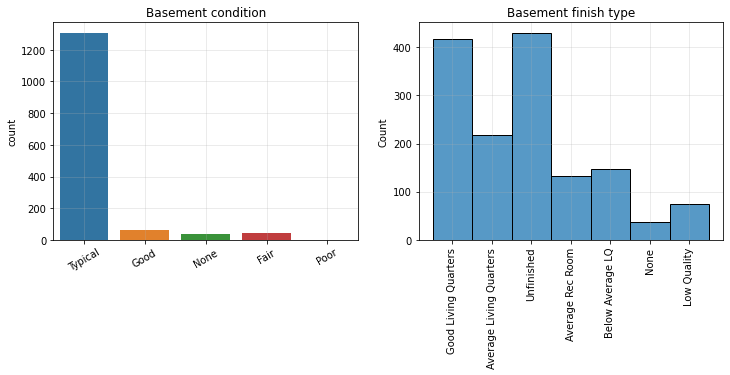

In [39]:
bcond_lab=['Typical', 'Good', 'None', 'Fair', 'Poor']
bfin_lab=['Good Living Quarters', 'Average Living Quarters', 'Unfinished', 'Average Rec Room', 'Below Average LQ', 'None', 'Low Quality']
plt.figure(figsize=(12,4))
ax0=plt.subplot(1,2,1)
sns.countplot(data=houses, x=houses['BsmtCond'])
plt.xlabel('')
plt.title('Basement condition')
ax0.set_xticks(range(len(bcond_lab)))
ax0.set_xticklabels(bcond_lab, rotation=30)
plt.grid(alpha = 0.3)
ax1=plt.subplot(1,2,2)
sns.histplot(data=houses, x=houses['BsmtFinType1'])
plt.xlabel('')
plt.title('Basement finish type')
ax1.set_xticks(range(len(bfin_lab)))
ax1.set_xticklabels(bfin_lab, rotation=90)
plt.grid(alpha = 0.3)
plt.show()

- Basements are mostly unfinished or are equipped in good or average living quarters.
- Basement condition is mostly typical

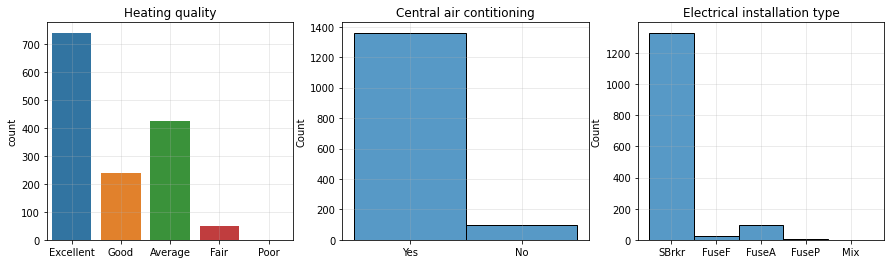

In [40]:
heat_lab=['Excellent', 'Good', 'Average', 'Fair', 'Poor']
air_lab=['Yes', 'No']
plt.figure(figsize=(15,4))
ax0=plt.subplot(1,3,1)
sns.countplot(data=houses, x=houses['HeatingQC'])
plt.xlabel('')
plt.title('Heating quality')
ax0.set_xticks(range(len(heat_lab)))
ax0.set_xticklabels(heat_lab)
plt.grid(alpha = 0.3)
ax1=plt.subplot(1,3,2)
sns.histplot(data=houses, x=houses['CentralAir'])
plt.xlabel('')
plt.title('Central air contitioning')
ax1.set_xticks([0,1])
ax1.set_xticklabels(air_lab)
plt.grid(alpha = 0.3)
ax2=plt.subplot(1,3,3)
sns.histplot(data=houses, x=houses['Electrical'])
plt.xlabel('')
plt.title('Electrical installation type')
plt.grid(alpha = 0.3)
plt.show()

- Mostly, quality of heating systems is excellent or average, most houses have central air conditioning and new electrical installation type (SBrkr).

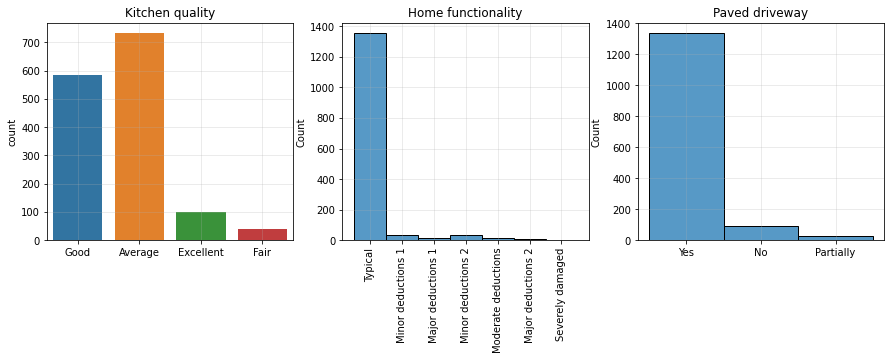

In [41]:
kitch_lab=['Good', 'Average', 'Excellent', 'Fair']
func_lab=['Typical', 'Minor deductions 1', 'Major deductions 1', 'Minor deductions 2', 'Moderate deductions', 'Major deductions 2', 'Severely damaged']
drive_lab=['Yes', 'No', 'Partially']
plt.figure(figsize=(15,4))
ax0=plt.subplot(1,3,1)
sns.countplot(data=houses, x=houses['KitchenQual'])
plt.xlabel('')
plt.title('Kitchen quality')
plt.grid(alpha = 0.3)
ax0.set_xticks(range(len(kitch_lab)))
ax0.set_xticklabels(kitch_lab)
ax1=plt.subplot(1,3,2)
sns.histplot(data=houses, x=houses['Functional'])
plt.xlabel('')
plt.title('Home functionality')
plt.grid(alpha = 0.3)
ax1.set_xticks(range(len(func_lab)))
ax1.set_xticklabels(func_lab, rotation=90)
ax2=plt.subplot(1,3,3)
sns.histplot(data=houses, x=houses['PavedDrive'])
plt.xlabel('')
plt.title('Paved driveway')
ax2.set_xticks([0,1,2])
ax2.set_xticklabels(drive_lab)
plt.grid(alpha = 0.3)
plt.show()

- Kitchens are mostly in good or average shape.
- Functionality of houses is in almost all cases typical. Only some have minor or major damages.
- Most driveways are paved.

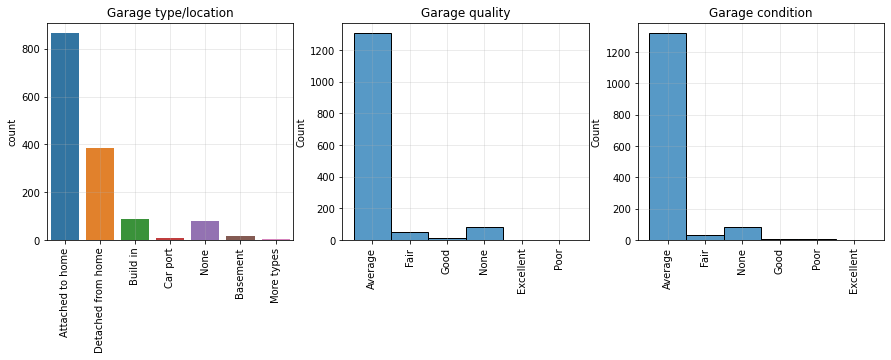

In [42]:
gType_lab=['Attached to home', 'Detached from home', 'Build in', 'Car port', 'None', 'Basement', 'More types']
gQual_lab=['Average', 'Fair', 'Good', 'None', 'Excellent', 'Poor']
gCond_lab=['Average', 'Fair', 'None', 'Good', 'Poor', 'Excellent']
plt.figure(figsize=(15,4))
ax0=plt.subplot(1,3,1)
sns.countplot(data=houses, x=houses['GarageType'])
plt.xlabel('')
plt.title('Garage type/location')
ax0.set_xticks(range(len(gType_lab)))
ax0.set_xticklabels(gType_lab, rotation=90)
plt.grid(alpha = 0.3)
ax1=plt.subplot(1,3,2)
sns.histplot(data=houses, x=houses['GarageQual'])
plt.xlabel('')
plt.title('Garage quality')
ax1.set_xticks(range(len(gQual_lab)))
ax1.set_xticklabels(gQual_lab, rotation=90)
plt.grid(alpha = 0.3)
ax2=plt.subplot(1,3,3)
sns.histplot(data=houses, x=houses['GarageCond'])
plt.xlabel('')
plt.title('Garage condition')
ax2.set_xticks(range(len(gCond_lab)))
ax2.set_xticklabels(gCond_lab, rotation=90)
plt.grid(alpha = 0.3)
plt.show()

- Most garages are attached to home, some are detached or build in. There are some houses without garage.
- Usually garage quality and condition is average. Those variables are very similar and can correlate with each other.

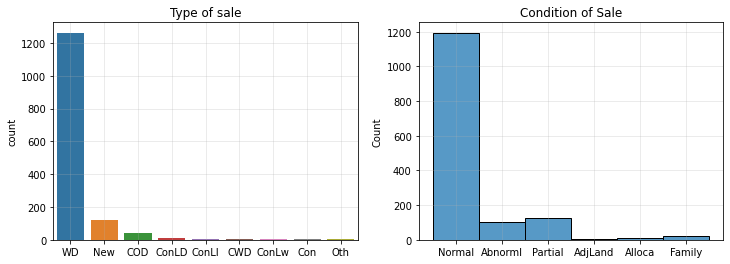

In [43]:
plt.figure(figsize=(12,4))
ax0=plt.subplot(1,2,1)
sns.countplot(data=houses, x=houses['SaleType'])
plt.xlabel('')
plt.title('Type of sale')
plt.grid(alpha = 0.3)
ax1=plt.subplot(1,2,2)
sns.histplot(data=houses, x=houses['SaleCondition'])
plt.xlabel('')
plt.title('Condition of Sale')
plt.grid(alpha = 0.3)
plt.show()

- Most properties have conventional warranty deed.
- In most cases sale conditions were normal.

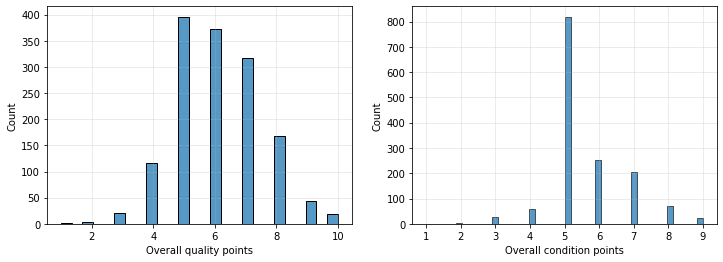

In [44]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=houses['OverallQual'])
plt.xlabel('Overall quality points')
plt.grid(alpha = 0.3)
plt.subplot(1,2,2)
sns.histplot(data=houses['OverallCond'])
plt.xlabel('Overall condition points')
plt.grid(alpha = 0.3)
plt.show()

- Most houses obtaned 5 or 6 quality point (out of 10) and 5 overall condition points (of 9 possible). 

<H3> Bivariate analysis</H3>

- Only categorical variables with strong influence on Sale Price will be presented.

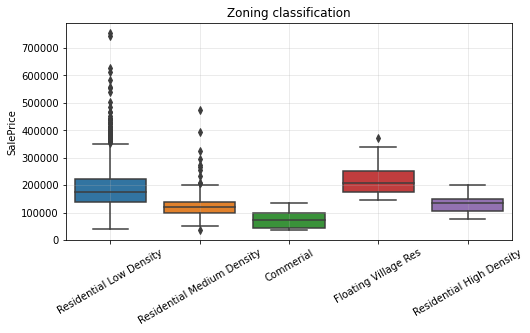

In [45]:
plt.figure(figsize=(8,4))
ax0=sns.boxplot(x='MSZoning', y='SalePrice', data=houses)
plt.xlabel('')
plt.title('Zoning classification')
ax0.set_xticklabels(['Residential Low Density', 'Residential Medium Density', 'Commerial', 'Floating Village Res', 'Residential High Density'], rotation=30)
plt.grid(alpha = 0.3)
plt.show()

- There is a significant difference between mean sale price of commercial and residential properties, especially between commercial and floating village residential (over 100000USD).

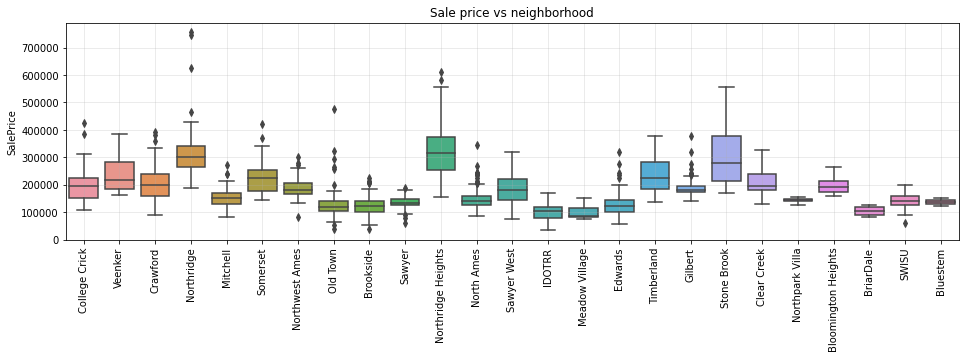

In [46]:
plt.figure(figsize=(16,4))
ax0=sns.boxplot(x='Neighborhood', y='SalePrice', data=houses)
plt.title('Sale price vs neighborhood')
plt.xlabel('')
ax0.set_xticks(range(len(neigh_labels)))
ax0.set_xticklabels(neigh_labels, rotation=90)
plt.grid(alpha = 0.3)
plt.show()

- The highest mean sale price are in Northridge, Northridge Heights and Stone Brook neighborhoods.
- The cheapest are Meadow Village, IDOTRR and BriarDale neighborhoods.

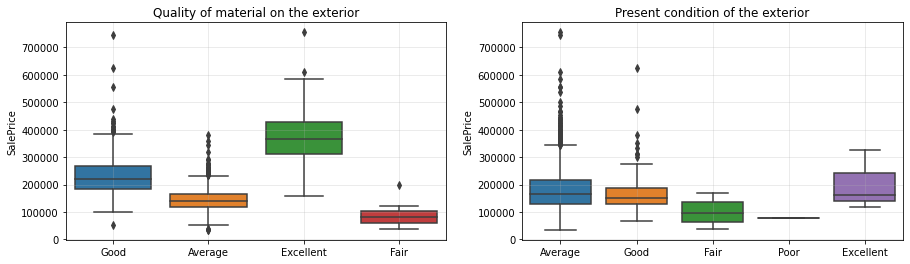

In [47]:
qual_lab=['Good', 'Average', 'Excellent', 'Fair']
cond_lab=['Average', 'Good', 'Fair', 'Poor', 'Excellent']
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
ax1=sns.boxplot(x='ExterQual', y='SalePrice', data=houses)
plt.xlabel('')
plt.title('Quality of material on the exterior')
ax1.set_xticks(range(len(qual_lab)))
ax1.set_xticklabels(qual_lab)
plt.grid(alpha = 0.3)
plt.subplot(1,2,2)
ax2=sns.boxplot(x='ExterCond', y='SalePrice', data=houses)
plt.xlabel('')
plt.title('Present condition of the exterior')
ax2.set_xticks(range(len(cond_lab)))
ax2.set_xticklabels(cond_lab)
plt.grid(alpha = 0.3)
plt.show()

- As expected houses with high quality and in good condition are more expensive.

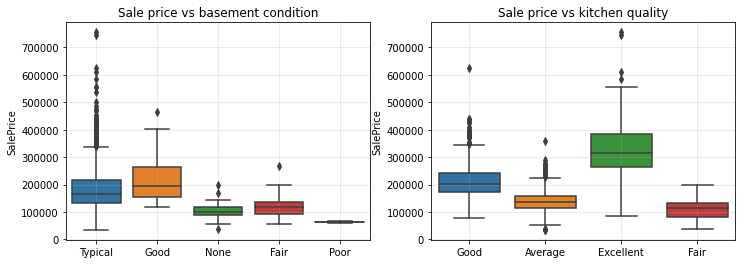

In [48]:
bcond_lab=['Typical', 'Good', 'None', 'Fair', 'Poor']
kitch_lab=['Good', 'Average', 'Excellent', 'Fair']
plt.figure(figsize=(12,4))
ax0=plt.subplot(1,2,1)
sns.boxplot(x='BsmtCond', y='SalePrice', data=houses)
plt.xlabel('')
plt.title('Sale price vs basement condition')
ax0.set_xticks(range(len(bcond_lab)))
ax0.set_xticklabels(bcond_lab)
plt.grid(alpha = 0.3)
ax1=plt.subplot(1,2,2)
sns.boxplot(x='KitchenQual', y='SalePrice', data=houses)
plt.xlabel('')
plt.title('Sale price vs kitchen quality')
ax1.set_xticks(range(len(kitch_lab)))
ax1.set_xticklabels(kitch_lab)
plt.grid(alpha = 0.3)
plt.show()

- Houses with high quality kitchen and with basement in good condition are more expensive.

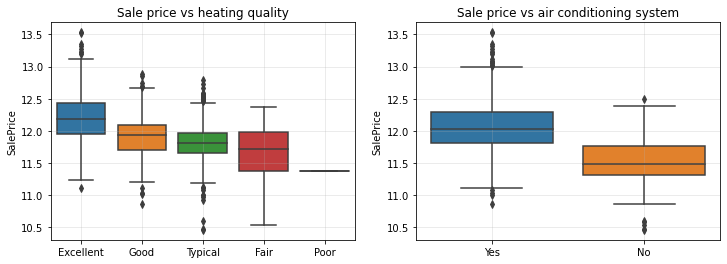

In [252]:
hqual_lab=['Excellent', 'Good', 'Typical', 'Fair', 'Poor']
air_sys=['Yes', 'No']
plt.figure(figsize=(12,4))
ax0=plt.subplot(1,2,1)
sns.boxplot(x='HeatingQC', y='SalePrice', data=houses)
plt.xlabel('')
plt.title('Sale price vs heating quality')
ax0.set_xticks(range(len(hqual_lab)))
ax0.set_xticklabels(hqual_lab)
plt.grid(alpha = 0.3)
ax1=plt.subplot(1,2,2)
sns.boxplot(x='CentralAir', y='SalePrice', data=houses)
plt.xlabel('')
plt.title('Sale price vs air conditioning system')
ax1.set_xticks(range(len(air_sys)))
ax1.set_xticklabels(air_sys)
plt.grid(alpha = 0.3)
plt.show()

- Houses with high quality heating and equipped with air conditioning systems are more expensive.

<H4> Correlations</H4>

Correlations that will be examined:
- between quantitative values and target value (some features that don't correlate strongly with target value can be removed, because don't have much impact on model),
- mutuall correlations between features (highly correlated features can worsen model results)

In [225]:
houses.corr()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,...,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
MSSubClass,1.000000,-0.271663,0.035269,-0.060902,0.028233,0.042913,-0.240061,-0.253716,0.309353,-0.000680,...,0.178848,-0.024295,0.283031,-0.047894,-0.098875,-0.021953,-0.004925,-0.011779,-0.025905,-0.083704
LotArea,-0.271663,1.000000,0.178984,-0.020832,0.042309,0.037385,0.349510,0.417833,0.113368,0.148947,...,0.082064,0.193246,-0.015707,0.321785,0.301029,0.222886,0.166592,-0.005668,0.096518,0.354494
OverallQual,0.035269,0.178984,1.000000,-0.091319,0.572631,0.551228,0.538762,0.477005,0.296381,0.111698,...,0.274044,0.102396,-0.183924,0.398868,0.562140,0.243126,0.309105,-0.113907,0.065007,0.792761
OverallCond,-0.060902,-0.020832,-0.091319,1.000000,-0.375955,0.073196,-0.171495,-0.144354,0.027819,-0.053970,...,-0.060537,0.011421,-0.086984,-0.024927,-0.150952,-0.003370,-0.033372,0.070580,0.054976,-0.078005
YearBuilt,0.028233,0.042309,0.572631,-0.375955,1.000000,0.593682,0.393560,0.283706,0.010383,0.189569,...,0.242421,-0.070274,-0.174953,0.149964,0.479250,0.227387,0.188840,-0.387587,-0.050535,0.525587
YearRemodAdd,0.042913,0.037385,0.551228,0.073196,0.593682,1.000000,0.293304,0.242291,0.139384,0.124441,...,0.183666,-0.040830,-0.149801,0.113550,0.372152,0.209728,0.225213,-0.194210,-0.038805,0.509796
TotalBsmtSF,-0.240061,0.349510,0.538762,-0.171495,0.393560,0.293304,1.000000,0.818390,-0.173343,0.302721,...,-0.046020,0.050412,-0.068305,0.334352,0.487177,0.231416,0.249412,-0.094404,0.085836,0.611049
1stFlrSF,-0.253716,0.417833,0.477005,-0.144354,0.283706,0.242291,0.818390,1.000000,-0.201383,0.239096,...,-0.117335,0.128140,0.069196,0.405810,0.489994,0.233593,0.213772,-0.064071,0.090167,0.603334
2ndFlrSF,0.309353,0.113368,0.296381,0.027819,0.010383,0.139384,-0.173343,-0.201383,1.000000,-0.167211,...,0.610005,0.502584,0.059178,0.197728,0.139606,0.095688,0.207286,0.061749,0.040418,0.322351
BsmtFullBath,-0.000680,0.148947,0.111698,-0.053970,0.189569,0.124441,0.302721,0.239096,-0.167211,1.000000,...,-0.027795,-0.150985,-0.040867,0.130265,0.178444,0.167907,0.071230,-0.048691,0.024502,0.222616


Variables with correlation to target variable less than 0.1 will be removed.

In [49]:
num_cols_to_drop = ['MSSubClass', 'OverallCond']
houses.drop(num_cols_to_drop, axis=1, inplace=True)
houses.shape

(1456, 40)

Correlated features 
- idea and code based on notebook from Kaggle, author YANA DAV (https://www.kaggle.com/yanadav/eda-preprocessing-linear-regression/notebook#Linear-Regression)

<AxesSubplot:>

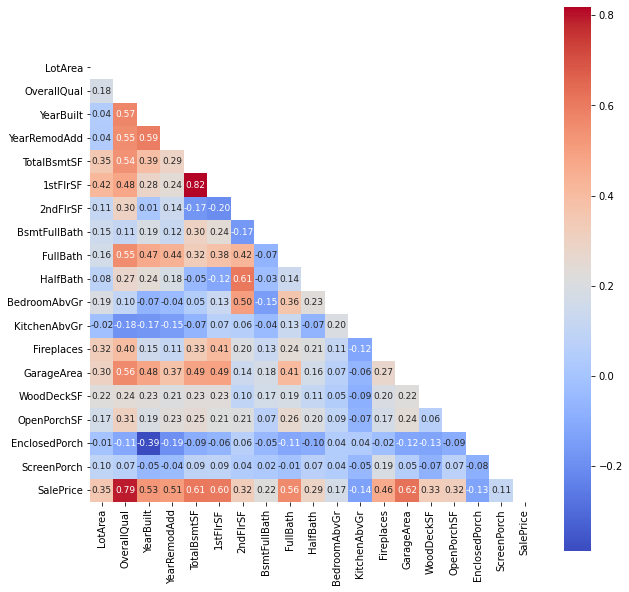

In [50]:
num_corr = houses.corr()
corr_triu = num_corr.where(np.triu(np.ones(num_corr.shape), k=1).astype(np.bool))

plt.figure(figsize=(10,10))
sns.heatmap(num_corr,annot=True, square=True, fmt='.2f',\
            annot_kws={'size':9}, mask = np.triu(corr_triu), cmap= "coolwarm")


- Two features: 'TotalBsmntSF' and '1stFlrSF' are strongly correlated (correlation coefficient 0.82). One, namely '1stFlrSF', will be removed.

In [51]:
num_cols_to_drop_2 = ['1stFlrSF']
houses.drop(num_cols_to_drop_2, axis=1, inplace=True)
houses.shape

(1456, 39)

<H3> Encoding data</H3>

In [52]:
houses.columns

Index(['MSZoning', 'LotArea', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'Exterior1st',
       'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtFinType1', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'GarageType', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

In [53]:
houses.shape

(1456, 39)

<H3> Distribution of the target value analysis</H3>
- idea and code based on notebook from Kaggle, author YANA DAV (https://www.kaggle.com/yanadav/eda-preprocessing-linear-regression/notebook#Linear-Regression)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


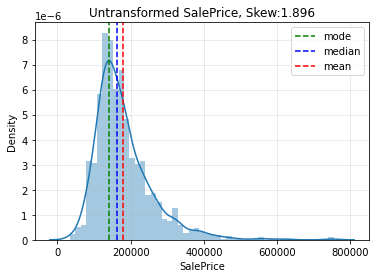

In [54]:
from scipy import stats
plt.title('Untransformed SalePrice, Skew:' +  str(round(stats.skew(houses['SalePrice']),3)))
sns.distplot(houses['SalePrice'])
plt.axvline(houses['SalePrice'].mode().to_numpy(), linestyle='--', color='green', label='mode')
plt.axvline(houses['SalePrice'].median(), linestyle='--', color='blue', label='median')
plt.axvline(houses['SalePrice'].mean(), linestyle='--', color='red', label='mean')
plt.grid(alpha = 0.3)
plt.legend()
plt.show()

- The target variable SalePrice is right-skewed.
- The mean is biased towards a higher price than the median.
- Therefore, I will transform the target variable by using log function.

In [55]:
houses['SalePrice'] = np.log(houses['SalePrice'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


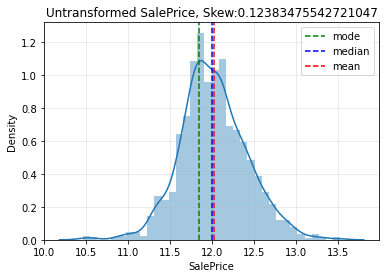

In [56]:
plt.title('Untransformed SalePrice, Skew:' +  str(stats.skew(houses['SalePrice'])))
sns.distplot(houses['SalePrice'])
plt.axvline(houses['SalePrice'].mode().to_numpy(), linestyle='--', color='green', label='mode')
plt.axvline(houses['SalePrice'].median(), linestyle='--', color='blue', label='median')
plt.axvline(houses['SalePrice'].mean(), linestyle='--', color='red', label='mean')
plt.grid(alpha = 0.3)
plt.legend()

In [57]:
X=houses.iloc[:,0:-1]
Y=houses.iloc[:,-1:]

In [58]:
X.shape

(1456, 38)

<H3> Categorical ordinal features encoding </H3> 

In [59]:
transform_dict_corr = {'OverallQual': {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10},
 'OverallCond': {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9},
 'ExterQual': {'Ex': 5, 'Fa': 2, 'Gd': 4, 'TA': 3},
 'ExterCond': {'Ex': 5, 'Fa': 2, 'Gd': 4, 'Po': 1, 'TA': 3},
 'BsmtCond': {'Fa': 2, 'Gd': 4, 'None': 0, 'Po': 1, 'TA': 3},
 'BsmtFinType1': {'ALQ': 5, 'BLQ': 4, 'GLQ': 6, 'LwQ': 2, 'None': 0, 'Rec': 3, 'Unf': 1},
 'HeatingQC': {'Ex': 5, 'Fa': 2, 'Gd': 4, 'Po': 1, 'TA': 3},
 'KitchenQual': {'Ex': 5, 'Fa': 2, 'Gd': 4, 'TA': 3},
 'Functional': {'Maj1': 3, 'Maj2': 2, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Sev': 1, 'Typ': 7},
 'GarageQual': {'Ex': 5, 'Fa': 2, 'Gd': 4, 'None': 0, 'Po': 1, 'TA': 3},
 'GarageCond': {'Ex': 5, 'Fa': 2, 'Gd': 4, 'None': 0, 'Po': 1, 'TA': 3}}

In [60]:
ordinal_df_replaced=X.replace(transform_dict_corr)
ordinal_df_replaced

,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,BldgType,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition
0,RL,8450,Reg,Inside,CollgCr,1Fam,7,2003,2003,VinylSd,...,548,3,3,Y,0,61,0,0,WD,Normal
1,RL,9600,Reg,FR2,Veenker,1Fam,6,1976,1976,MetalSd,...,460,3,3,Y,298,0,0,0,WD,Normal
2,RL,11250,IR1,Inside,CollgCr,1Fam,7,2001,2002,VinylSd,...,608,3,3,Y,0,42,0,0,WD,Normal
3,RL,9550,IR1,Corner,Crawfor,1Fam,7,1915,1970,Wd Sdng,...,642,3,3,Y,0,35,272,0,WD,Abnorml
4,RL,14260,IR1,FR2,NoRidge,1Fam,8,2000,2000,VinylSd,...,836,3,3,Y,192,84,0,0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,7917,Reg,Inside,Gilbert,1Fam,6,1999,2000,VinylSd,...,460,3,3,Y,0,40,0,0,WD,Normal
1456,RL,13175,Reg,Inside,NWAmes,1Fam,6,1978,1988,Plywood,...,500,3,3,Y,349,0,0,0,WD,Normal
1457,RL,9042,Reg,Inside,Crawfor,1Fam,7,1941,2006,CemntBd,...,252,3,3,Y,0,60,0,0,WD,Normal
1458,RL,9717,Reg,Inside,NAmes,1Fam,5,1950,1996,MetalSd,...,240,3,3,Y,366,0,112,0,WD,Normal


<H3> Categorical nominal features dummy encoding</H3>

In [61]:
dummies_df = pd.get_dummies(ordinal_df_replaced)
dummies_df.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtCond,BsmtFinType1,TotalBsmtSF,HeatingQC,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,2003,2003,4,3,3,6,856,5,...,0,0,0,1,0,0,0,0,1,0
1,9600,6,1976,1976,3,3,3,5,1262,5,...,0,0,0,1,0,0,0,0,1,0
2,11250,7,2001,2002,4,3,3,6,920,5,...,0,0,0,1,0,0,0,0,1,0
3,9550,7,1915,1970,3,3,4,5,756,4,...,0,0,0,1,1,0,0,0,0,0
4,14260,8,2000,2000,4,3,3,6,1145,5,...,0,0,0,1,0,0,0,0,1,0


In [62]:
#from sklearn.preprocessing import StandardScaler
#standardized = StandardScaler().fit_transform(dummies_df)

#X_standardized = pd.DataFrame(data=standardized, columns=list(dummies_df.columns))
#X_standardized.head()
#X_standardized

<H3> Train/Test split</H3>

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X.shape

(1456, 38)

In [65]:
Y.shape

(1456, 1)

In [66]:
x_train, x_test, y_train, y_test = train_test_split(dummies_df,Y, train_size=0.8, random_state=42)

<H3>Linear regression</H3>

In [67]:
from sklearn.linear_model import LinearRegression
LR_model=LinearRegression()
LR_model.fit(x_train, y_train)
y_pred=LR_model.predict(x_test)

In [68]:
print('Training set score: %.3f' % LR_model.score(x_train,y_train))

Training set score: 0.894


In [69]:
print('Test set score: %.3f' % LR_model.score(x_test,y_test))

Test set score: 0.892


In [70]:
# pair the feature names with the coefficients (from RitchieNG)
feature_cols=dummies_df.columns
coeff=list(zip(feature_cols, list(LR_model.coef_[0])))

In [71]:
df = pd.DataFrame(coeff, columns =['Variable Name', 'LR coefficent'])
df.sort_values(by=['LR coefficent'], ascending=False).head(10)

,Variable Name,LR coefficent
80,Exterior1st_Stone,0.265318
62,Neighborhood_StoneBr,0.220527
108,SaleType_New,0.213799
56,Neighborhood_NridgHt,0.160116
46,Neighborhood_Crawfor,0.141411
105,SaleType_ConLD,0.134586
55,Neighborhood_NoRidge,0.130761
73,Exterior1st_BrkFace,0.123665
40,Neighborhood_Blmngtn,0.105985
113,SaleCondition_Alloca,0.101814


Most important features influencing the house price increase:
- sale types: New (just constructed and sold), ConLD (Contract Low Down),
- neighborhoods: Stone Brook, Northridge Heights, Crawford, Northridge, Clear Creek, Veenker, Bloomington Heights,
- Exterior covering on house: Brick Face.

In [72]:
df.sort_values(by=['LR coefficent'], ascending=True).head(10)

,Variable Name,LR coefficent
72,Exterior1st_BrkComm,-0.228856
50,Neighborhood_MeadowV,-0.206250
26,MSZoning_C (all),-0.205596
116,SaleCondition_Partial,-0.174010
90,Electrical_Mix,-0.165258
33,LotShape_IR3,-0.150284
49,Neighborhood_IDOTRR,-0.130435
42,Neighborhood_BrDale,-0.120593
41,Neighborhood_Blueste,-0.118685
107,SaleType_ConLw,-0.112725


Most important features influencing the house price decrease:
- sale condition: Partial (Home was not completed when last assesed),
- neighborhoods: Meadow Village, Bluestem, Iowa DOT and Rail Road, Old Town, Briardale,
- zoning classification: commercial,
- exterior covering on house: Brick Common,
- lot shape: irregular,
- sale type: Contract Low Down payment and low interest.